# Star Wars Espisode 1 Data Clean

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import json


## Cleaning Raw Data



### Episode 2

In [2]:
filename = './data/01_star_wars_raw.txt'

with open(filename, 'r') as raw_file:
    raw_lines = raw_file.readlines()

print(f'Lines {len(raw_lines)}')

Lines 4230


In [3]:
paragraphs = dict()

paragraph_num = 1
paragraphs[paragraph_num] = dict()
paragraphs[paragraph_num]['lines'] =list()

for line in raw_lines:
    if line == '\n':
        paragraph_num += 1
        paragraphs[paragraph_num] = dict()
        paragraphs[paragraph_num]['lines'] =list()
    else:
        paragraphs[paragraph_num]['lines'].append(line.replace('\n', '').replace('\t', '').replace('�', 'E'))
        
for p_num, content in paragraphs.items():
    print(f'****** {p_num} ({len(content)}) *****')
    print(content['lines'])
    if p_num > 20:
        break
    

****** 1 (1) *****
['Star Wars: Episode 1:The Phantom Menace']
****** 2 (1) *****
[]
****** 3 (1) *****
[]
****** 4 (1) *****
['TITLE CARD : A long time ago in a galaxy far, far away....']
****** 5 (1) *****
['A vast sea of stars serves as the backdrop for the main title, followed by', 'a roll up, which crawls up into infinity.']
****** 6 (1) *****
['EPISODE 1 THE PHANTOM MENACE']
****** 7 (1) *****
['Turmoil has engulfed the Galactic Republic. The taxation of trade routes to', 'outlaying star systems is in dispute.', 'Hoping to resolve the matter with a blockade of deadly battleships, the', 'greedy Trade Federation has stopped all shipping to the small planet of', 'Naboo.', 'While the congress of the Republic endlessly debates this alarming chain of', 'events, the Supreme Chancellor has secretly dispatched two Jedi Knights,', 'the guardians of peace and justice in the galaxy, to settle the', 'conflict.....']
****** 8 (1) *****
['PAN DOWN to reveal a small space cruiser heading TOWARD 

In [4]:
save_json = False
if save_json:
    filename = './output/paragraphs.json'
    with open(filename, 'w') as json_file:
        json.dump(paragraphs, json_file)

In [9]:
actor_regexp = re.compile(r'(([A-Z\-0-9]+)\s?([A-Z0-9\-]+)?)')
actor_lines = dict()
#print(paragraphs[161])
for p_num, content in paragraphs.items():
    #actor_lines[p_num]['actor'] = ''
    if len(content['lines']) >0:
        match = actor_regexp.match(content['lines'][0])
        if match and len(content['lines']) > 1:
            actor_lines[p_num]= dict()
            actor_lines[p_num]['actor'] = match.group(1)
            actor_lines[p_num]['lines'] = content['lines'].copy()
            actor_lines[p_num]['lines'].pop(0)
            #print(f'========= {p_num} {actor_lines[p_num]["actor"]} =====')
            #print(actor_lines[p_num]['lines'])
        else:
            pass
            #print(f'>>> {p_num}')
            #print(content['lines'])
            #print('>>>'*60)
    else:
        pass
        #print(f'>>>> Paragraph {p_num} is empty')
        #print(content['lines'])
        


In [10]:
df_dict = dict()
df_dict['Paragraph'] = list()
df_dict['Character'] = list()
df_dict['Dialogue'] = list()
for p_num, content in actor_lines.items():
    df_dict['Paragraph'].append(p_num)
    df_dict['Character'].append(content['actor'])
    df_dict['Dialogue'].append(' '.join(content['lines']))
    

In [11]:
df = pd.DataFrame.from_dict(df_dict)
df.head()

,Paragraph,Character,Dialogue
0,5,A,"a roll up, which crawls up into infinity."
1,7,T,outlaying star systems is in dispute. Hoping t...
2,8,PAN DOWN,speed. PAN with the cruiser as it heads toward...
3,11,I,of the battleships.
4,14,CAPTAIN,QUI-GON : (V.O) Tell them we wish to board at ...


In [12]:
df['Character'] = df['Character'].str.strip()
df['Character'].unique()

array(['A', 'T', 'PAN DOWN', 'I', 'CAPTAIN', 'A PROTOCOL', 'PK-4', 'EG-9',
       'TC-14', 'OBI-WAN', 'NUTE', 'OWO-1', 'QUI-GON', 'RUNE', 'TEY HOW',
       'O', 'AMIDALA', 'PALPATINE', 'CAPT', 'JAR JAR', 'GUNGANS',
       'BOSS NASS', 'S', 'P', 'QUEEN AMIDALA', 'BIBBLE', 'FOUR BATTLE',
       'CAPTAIN PANAKA', 'GUARD DROID', 'RIC OLIE', 'DARTH SIDIOUS',
       'PADME', 'B', 'WATTO', 'ARTOO', 'ANAKIN', 'SEBULBA', 'JIRA',
       'SHMI', 'THREEPIO', 'DARTH MAUL', 'KITSTER', 'SEEK', 'FODE', 'C',
       'JABBA', 'J', 'JABBA THE', 'FANTA', 'L', 'TERTER', 'FODE BEED',
       'F', 'SEVERAL FEDERATION', 'OOM-9', 'YODA', 'INT', 'GUARD',
       'LOTT DOD', 'AKS MOE', 'VALORUM', 'BAIL ORGANA', 'MACE WINDU',
       'SABE', 'PANAKA', 'A GUNGAN', 'GUNGAN LOOKOUT', 'DROID TROOPS',
       'ALARMS ARE', 'A DESTROYER', 'SADBE', 'SIX OF', 'BATTLE DROID',
       'BRAVO TWO', 'CHILDEREN SING'], dtype=object)

In [13]:
non_characters = ['EXT', 'T', 'S', 'INT', 'A', 'H', 'I', 'J','P','B',]

for character in non_characters:
    condition = (df['Character'] == character)
    df.drop(df[condition].index, inplace=True)



In [14]:
replacements = [('BOBA','BOBA FETT'), ('JANGO', 'JANGO FETT',), ( 'MACE', 'MACE WINDU'),
               ('MACE-WINDU', 'MACE WINDU'), ('WINDU', 'MACE WINDU'), ('THREEPIO', 'C-3PO'),
               ('OBI-WAM', 'OBI-WAN'), ('DOOKU', 'COUNT DOOKU')]
for pair in replacements:
    df.loc[df['Character'] == pair[0], 'Character'] = pair[1]

In [15]:
character_list = list(df['Character'].unique())
character_list.sort()
print(character_list)

['A DESTROYER', 'A GUNGAN', 'A PROTOCOL', 'AKS MOE', 'ALARMS ARE', 'AMIDALA', 'ANAKIN', 'ARTOO', 'BAIL ORGANA', 'BATTLE DROID', 'BIBBLE', 'BOSS NASS', 'BRAVO TWO', 'C', 'C-3PO', 'CAPT', 'CAPTAIN', 'CAPTAIN PANAKA', 'CHILDEREN SING', 'DARTH MAUL', 'DARTH SIDIOUS', 'DROID TROOPS', 'EG-9', 'F', 'FANTA', 'FODE', 'FODE BEED', 'FOUR BATTLE', 'GUARD', 'GUARD DROID', 'GUNGAN LOOKOUT', 'GUNGANS', 'JABBA', 'JABBA THE', 'JAR JAR', 'JIRA', 'KITSTER', 'L', 'LOTT DOD', 'MACE WINDU', 'NUTE', 'O', 'OBI-WAN', 'OOM-9', 'OWO-1', 'PADME', 'PALPATINE', 'PAN DOWN', 'PANAKA', 'PK-4', 'QUEEN AMIDALA', 'QUI-GON', 'RIC OLIE', 'RUNE', 'SABE', 'SADBE', 'SEBULBA', 'SEEK', 'SEVERAL FEDERATION', 'SHMI', 'SIX OF', 'TC-14', 'TERTER', 'TEY HOW', 'VALORUM', 'WATTO', 'YODA']


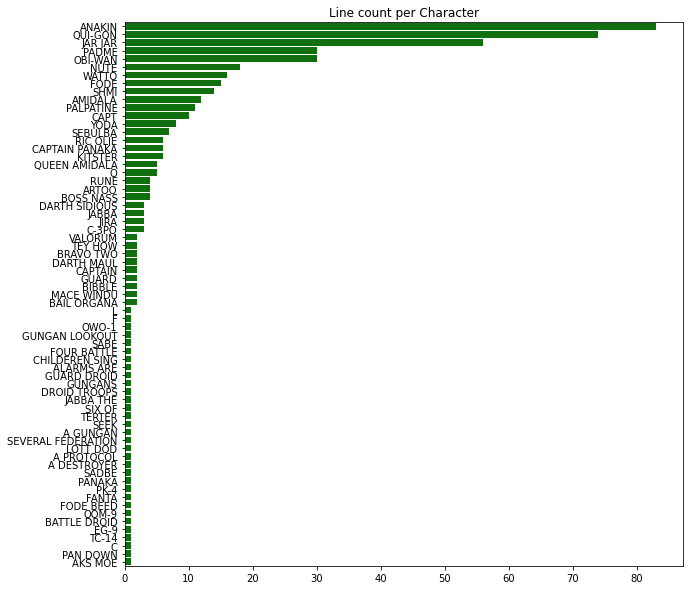

In [16]:
character_series = df['Character'].value_counts()
plt.figure(figsize=(10, 10))
ax = sns.barplot(x=character_series.values, y=character_series.index, color='green')

ax.set_title('Line count per Character')
plt.show()

In [17]:
character_series.describe()

count    67.000000
mean      7.253731
std      15.356711
min       1.000000
25%       1.000000
50%       2.000000
75%       5.500000
max      83.000000
Name: Character, dtype: float64

In [18]:
filename = './data/episode_01.pkl'
df.to_pickle(filename)